<a href="https://colab.research.google.com/github/Tournesol1008/Bike-Rental-Prediction---OLS/blob/main/GB705_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike-Sharing Program Analysis**

















> # Business Goal 

To help the bike-sharing company better allocate bike resources and reduce operational cost, we'll use 2-year historical bike rental time series dataset  to predict daily bike rentals using linear regression model.



> # Import the data




Let's begin our analysis by first importing some data analysis tools in Python
and load the data about bike rentals over a two-year period.

In [1]:
#Import the appropriate Python libraries. 
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#Load the csv file
url = 'http://bit.ly/bike-data'
df_bike = pd.read_csv(url)

In [3]:
#Calculate the dimensions (rows and columns) in the dataset. 
df_bike.shape

(731, 14)

In [4]:
#List the columns in the dataset along with their data types.
df_bike.dtypes

ID                      int64
date                   object
yr                      int64
mnth                    int64
weekday                 int64
season                  int64
holiday                 int64
working_day             int64
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
casual_rentals          int64
registered_rentals      int64
dtype: object

Now we know the basic structure of the dataset and the data type of each variable. One thing we might need to change is the data type of 'date' variable. However, since the data already extract the 'day', 'month' and 'year' from 'date' variable, we can just leave it as it is. 

In [5]:
# preview the first few records of the data
df_bike.head(5)

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518


The first 7 columns(date, year, month, weekday, season, whether holiday, whether working_day) are seasonal setting information. The next four columns(temperature, actual temperature, humidity, windspeed) are weather information and their values are all between 0-1 because they are normalized (which means the closer they are to 1, the greater their values). The last two columns are daily count of rental bikes usage of two different user groups (casual users and registered users).

We will use count of registered rentals and causal rentals as explained variables and other variables as potential explanatory variables.

> # Data Preprocessing

In [6]:
#Check if there are any missing values in the dataset.
print(df_bike.isnull().sum())
print(df_bike.shape)

ID                    0
date                  0
yr                    0
mnth                  0
weekday               0
season                0
holiday               0
working_day           0
temp                  0
atemp                 0
hum                   0
windspeed             0
casual_rentals        0
registered_rentals    0
dtype: int64
(731, 14)


Luckily, there are no missing values in the data. 

However, are the existing variables/columns enough to answer our business questions? The answer is no, since what we want to explore is the relationship between environmental indicators and daily bike rentals (whatever the types of rentals they are), we need to add a new column summing up the casual rentals and registered rentals.

In [7]:
#Create a new column called "total_rentals" that sums the "casual_rentals" and "registered_rentals" columns
df_bike['total_rentals'] = df_bike['casual_rentals'] + df_bike['registered_rentals']

In [8]:
#Confirm this new column was calculated correctly by previewing a few records. 
df_bike.head()

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600




> # Exploratory Data Analysis




Now that we have all cleaned data we need, we can start exploratory data analysis by first looking into some basic statistical details.

In [9]:
#Generate descriptive stats for the numeric columns in the dataset.
df_bike.describe()

,ID,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,2.997264,2.496580,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,2.004787,1.110807,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,3.000000,3.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,5.000000,3.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,6.000000,4.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Since the descriptive stats is a large and detailed data set, we might want to extract the significance of it by using pivot tables or graphs. 

First let's look at the distribution of a single variable: 'total_rentals'

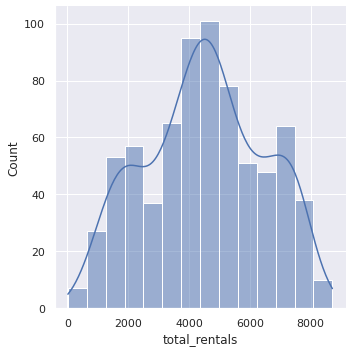

In [28]:
# Generate a histogram to visualize the distribution of data in the "total_rentals" column. 
sns.displot(x= 'total_rentals',data=df_bike, kde=True);

As shown in the histogram, the daily bike rentals roughly fit a normal distribution. The blue line represents KDE (you can think it as a probability density function), which gives us a more detailed distribution pattern.


In [15]:
#Create a pivot table that has "yr" and "mnth" as indices (in that order) and that sums and averages "total_rentals". Specifically, we want to focus on the monthly total bike rentals and the average of daily bike rentals per month.
pivot_dfbike = pd.pivot_table(df_bike,index=["yr","mnth"],values=["total_rentals"],aggfunc=[np.sum, np.mean])
pivot_dfbike

sum          mean
        total_rentals total_rentals
yr mnth                            
0  1            38189   1231.903226
   2            48215   1721.964286
   3            64045   2065.967742
   4            94870   3162.333333
   5           135821   4381.322581
   6           143512   4783.733333
   7           141341   4559.387097
   8           136691   4409.387097
   9           127418   4247.266667
   10          123511   3984.225806
   11          102167   3405.566667
   12           87323   2816.870968
1  1            96744   3120.774194
   2           103137   3556.448276
   3           164875   5318.548387
   4           174224   5807.466667
   5           195865   6318.225806
   6           202830   6761.000000
   7           203607   6567.967742
   8           214503   6919.451613
   9           218573   7285.766667
   10          198841   6414.225806
   11          152664   5088.800000
   12          123713   3990.741935

The pivot table shows the total rentals and average rentals for each month over the two years. For better understanding, let's leverage graphs to aid in visualization.

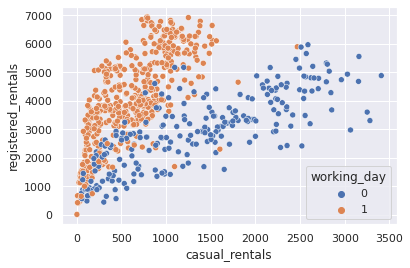

In [29]:
# Generate a scatterplot to show the relationship between "casual_rentals" and "registered_rentals" on a daily basis. Color the datapoints based on the "working_day." 
sns.scatterplot(x="casual_rentals", y="registered_rentals", hue="working_day", data=df_bike)

As we can see in the scatterplot, on working day, registerd rentals are 4 times more than casual rentals, but on weekends and holiday, registered rentals are roughly 2 times more than registered rentals.

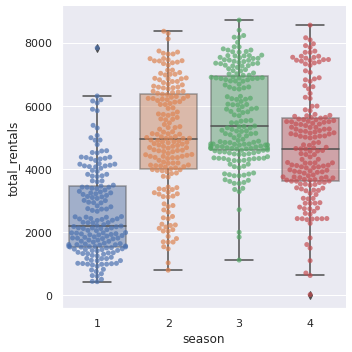

In [52]:
# Generate a swarmplot and boxplot to explore the total rentals by season. The "season" should be on the x-asis and "total_rentals" on the y-axis
sns.catplot(x="season", y="total_rentals", kind="swarm", data=df_bike, alpha=0.7)
sns.boxplot(x="season", y="total_rentals", data=df_bike, boxprops=dict(alpha=.5))

The swarmplot shows the daily total rentals by 4 seasons. Each data point represents the daily total rentals of that season. The boxplot gives us a more general statistical information: IQR and median. We can see that, overall, there are way less daily bike rentals in winter than other 3 seasons. While summer and spring have the highest number, the variance is also higher than other 2 seasons.

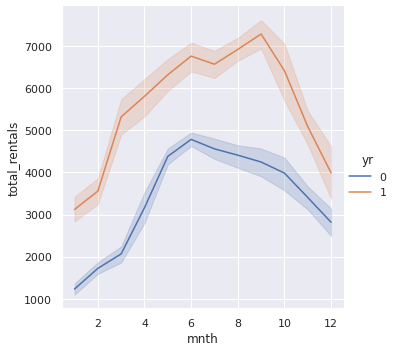

In [31]:
#Generate a line plot that shows average daily rentals by month and split the lines by year. The "mnth" should on the x-axis, the "total_rentals" on the yaxis.
sns.relplot(x="mnth", y="total_rentals", hue="yr", kind="line", data=df_bike);

The line plot shows the average daily rentals by month of the past 2 years. The annual total rentals almost tripled for the last 12 months. While the peak occurred in june for both the first and the second year, there is another peak in September for the second year, indicating a potential increase for the next year.

After understanding the relationship between seasonal settings and total rentals, let's explore the relationship between weather indicators and total rentals.

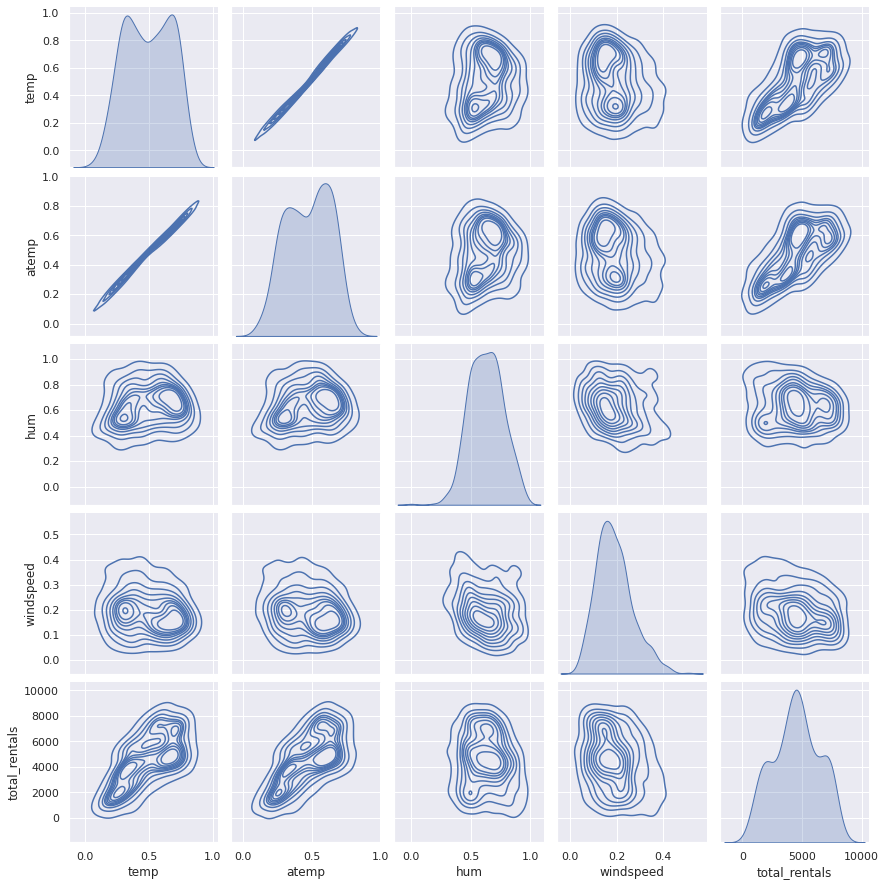

In [32]:
#Generate a pairplot to show the relationship between "total_rentals" and the weather indicators ("temp", "atemp", "hum", and "windspeed"), 
#which are continuous variables. (Use seaborn's "pairplot" function and set the kind="kde".)
df_weather_indicator = df_bike[['temp','atemp','hum','windspeed','total_rentals']]  
                 
df_pairplot = sns.pairplot(df_weather_indicator, kind= "kde")

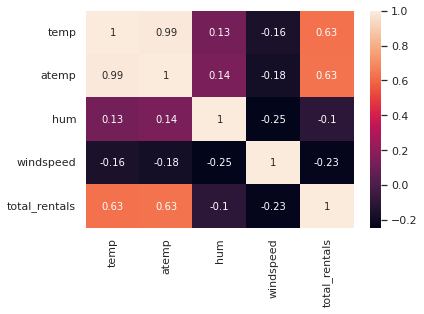

In [33]:
#Use a heatmap to visualize the correlation between "total_rentals" and the weather indicators which are continuous variables. Ensure that the correlations coefficients are shown on the heatmap. (Use seaborn's "heatmap" function, and add the coefficients by adding the following option: annot=TRUE)
sns.heatmap(df_weather_indicator.corr(), annot=True)



> # Modeling


As we can see in the correlation heatmap above, 'temp' is the only indicator that have a correlation coefficient (r) with respect to "total_rentals" greater than 0.5 , so we could build linear regression model with independent variable 'temp'(We do NOT include "atemp", since it is highly correlated with another independent variable ("temp") and thus not independent.) and dependent variable 'total_rentals'.

In [34]:
#In preparation for linear regression, separate the dependent variable (y) and independent variables (X)
X = df_bike[['temp']]
y = df_bike['total_rentals']

In [35]:
# Split the data into training and test sets. Put 25% of the data into the test set. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [36]:
#Train ("fit") the linear regression model using the training data. 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
#Identify the intercepts and coefficients of the regression model. 
print(model.intercept_)
print(model.coef_)

1327.930810368468
[6463.96764523]




> # Evaluation & Deployment


Now we have built our linear regression model. Let's try out and evaluate how effective the model is.

In [38]:
#Use the regression model to predict “total_rentals” when "temp" = 0.30. 
new_X = [[0.3]]
model.predict(new_X)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([3267.12110394])

In [39]:
#Use the regression model to predict total bike rentals in the test data. Store your predictions in a variable called "y_pred".
y_pred = model.predict(X_test)
y_pred

array([5766.52408142, 6175.90654429, 2836.18777293, 2570.13732862,
       3536.45524381, 4279.81152301, 4365.99560363, 4252.87616984,
       4155.91665516, 2643.20601889, 2260.99161202, 3428.72029507,
       3683.06449397, 5901.18791937, 6154.36214013, 5432.55026509,
       5098.57644877, 3843.49370696, 3288.6655081 , 4110.24872374,
       5895.80343432, 2965.46712584, 3391.01597179, 5804.22840469,
       2378.32555272, 5437.93475014, 6811.52787475, 5572.60505206,
       4748.44917729, 5098.57644877, 2222.11084664, 5561.829618  ,
       4215.17184656, 5820.38832381, 3741.14324327, 3369.46510367,
       6348.28116949, 6897.71841933, 4010.47738314, 4290.58049311,
       5012.39236815, 3677.44084212, 5314.04634625, 3961.9976258 ,
       5965.82759582, 4651.48966262, 3092.87192813, 5680.33353684,
       3035.49775131, 2963.59257522, 5933.5077576 , 6122.04230191,
       4328.29128035, 5567.21410304, 5917.34783848, 4295.97144213,
       3428.72029507, 4274.420574  , 6052.01167644, 3046.26672

In [40]:
#Generate the R squared. (Use the "metrics.r2_score" function.)
metrics.r2_score(y_test, y_pred)

0.37540464616240454

The R squared value of this model is 0.38, which represents slightly higher differences between the observed data and the predicted values. But this doesn't mean our model is bad. It is because the behavior of bike rentals have an inherently greater amount of unexplainable variation. The R squared values are bound to be lower. So our Linear regression model is acceptable.